Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [19]:
library(tidyverse)
library(palmerpenguins)

We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing measurement values by the maximum value for each by measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [20]:
penguins %>% head
penguins2 <-
    penguins %>%
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm, flipper_length_mm)) %>%
    group_by(name)%>%
    mutate(norm_value = value/max(value, na.rm = TRUE))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Now make the chart.

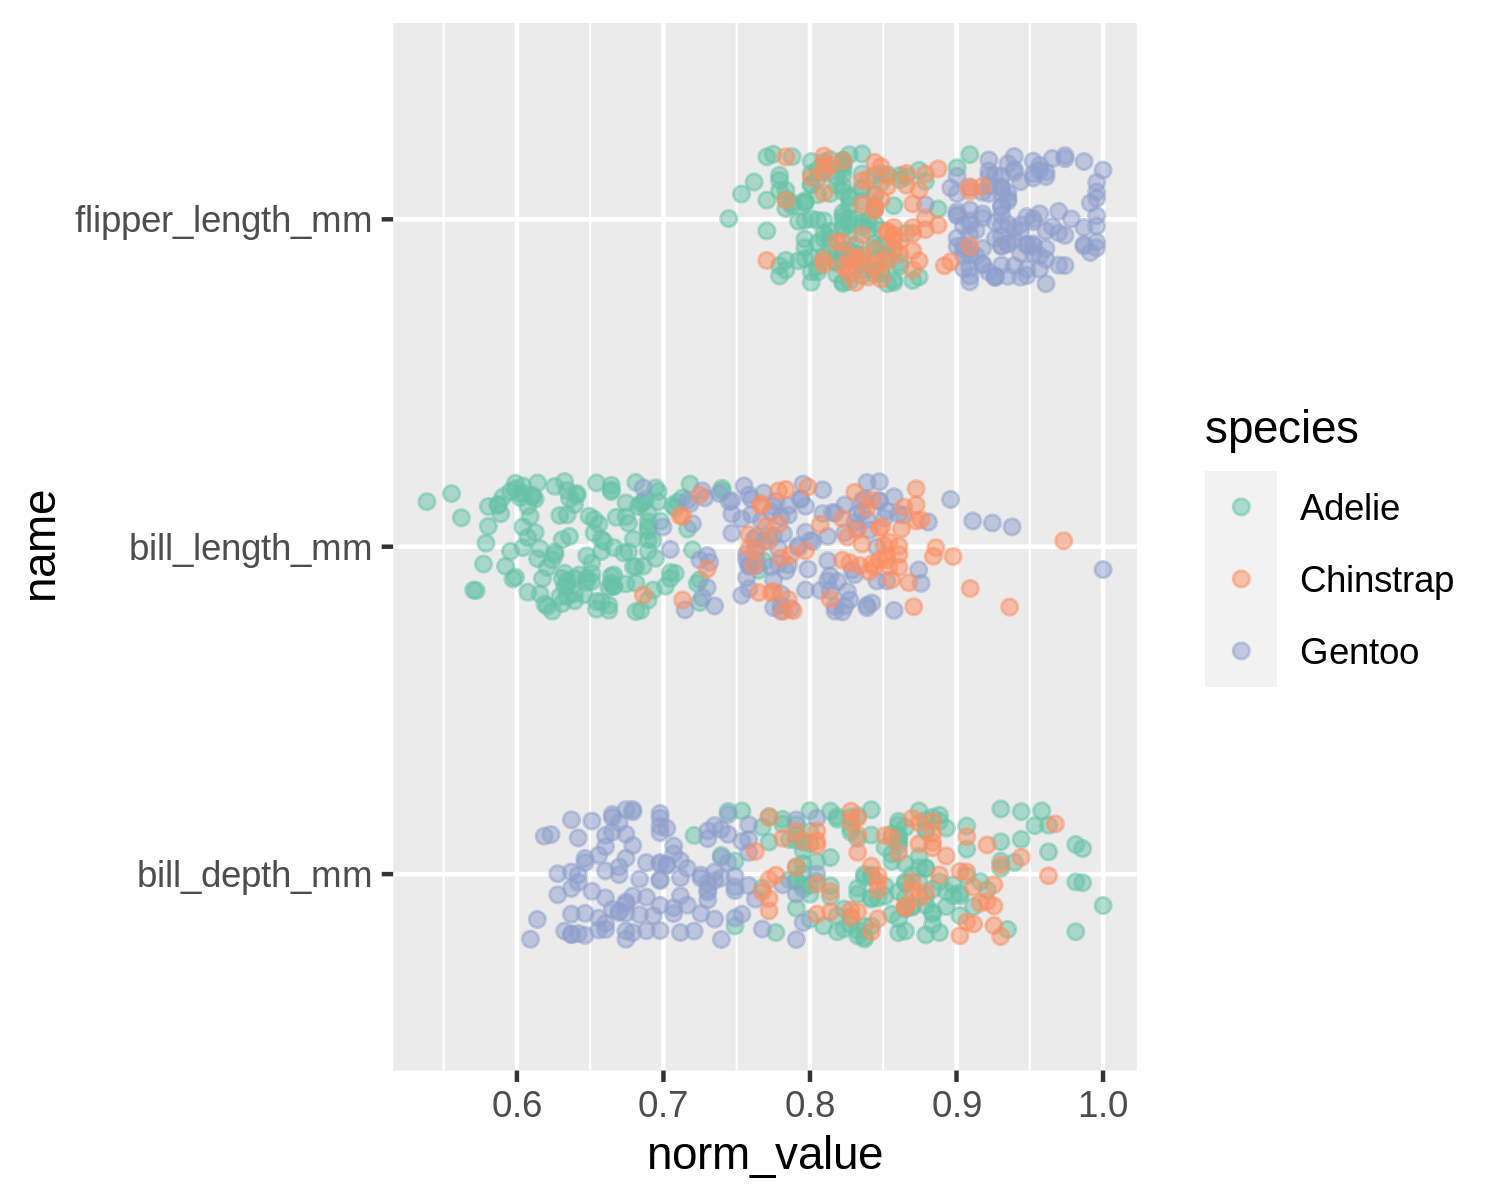

In [22]:
p = ggplot(penguins2, aes(x = norm_value, y = name, color = species))

p = p + geom_point(data = penguins2, 
                   position = position_jitter(h = 0.2, w = 0), na.rm = TRUE, alpha = 0.5)
p = p + scale_color_brewer(palette = 'Set2')
p